In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Data kamu
data = pd.read_excel(r"D:/Matana/Semester 4/komputasi statistik/coba_dataOLS.xlsx")
data

,PROVINSI,HARAPAN LAMA SEKOLAH 2022,RATA RATA LAMA SEKOLAH 2022,PENGELUARAN PER KAPITA 2022,IPM 2022
0,ACEH,14.37,9.79,1180133,72.80
1,SUMATERA UTARA,13.31,9.99,1216497,72.71
2,SUMATERA BARAT,14.10,9.51,1342986,73.26
3,RIAU,13.29,9.54,1425171,73.52
4,JAMBI,13.05,9.07,1261837,72.14
5,SUMATERA SELATAN,12.55,8.82,1148812,70.90
6,BENGKULU,13.68,9.28,1196484,72.16
7,LAMPUNG,12.74,8.61,1074987,70.45
8,KEP. BANGKA BELITUNG,12.18,8.57,1654281,72.24
9,KEPULAUAN RIAU,12.99,10.46,1831700,81.65


In [5]:
data["PENGELUARAN PER KAPITA 2022"] = data["PENGELUARAN PER KAPITA 2022"].astype(str).str.replace(".", "", regex=False).astype(int)
data["PENGELUARAN PER KAPITA 2022"] = pd.to_numeric(
    data["PENGELUARAN PER KAPITA 2022"].astype(str).str.replace(".", "", regex=False),
    errors="coerce"
)

X = data[["RATA RATA LAMA SEKOLAH 2022", "HARAPAN LAMA SEKOLAH 2022", "PENGELUARAN PER KAPITA 2022"]]
y = data["IPM 2022"]
X = sm.add_constant(X)

In [6]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IPM 2022   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.026
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.133
Time:                        12:43:50   Log-Likelihood:                -81.379
No. Observations:                  32   AIC:                             170.8
Df Residuals:                      28   BIC:                             176.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# UJI NORMALITAS

In [7]:
residuals = model.resid
shapiro_test = shapiro(residuals)
print("\nUji Normalitas (Shapiro-Wilk):")
print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")


Uji Normalitas (Shapiro-Wilk):
Statistic: 0.9434, p-value: 0.0938


In [8]:
residuals = model.resid
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_statistic}')

Durbin-Watson Statistic: 1.8615702016617202


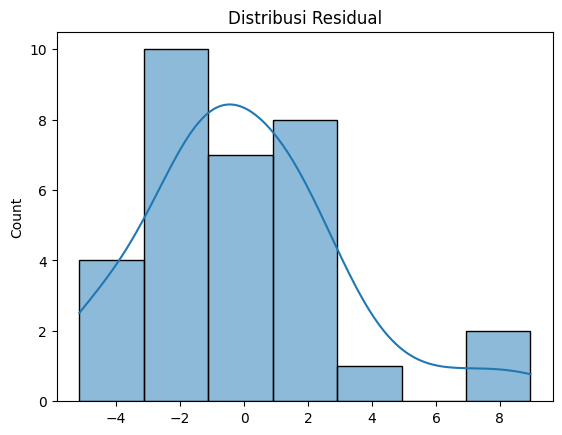

In [72]:
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual")
plt.show()

In [73]:
bp_test = het_breuschpagan(residuals, X)
print("\nUji Heteroskedastisitas (Breusch-Pagan):")
print(f"LM Stat: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")


Uji Heteroskedastisitas (Breusch-Pagan):
LM Stat: 0.9855, p-value: 0.8048


In [74]:
print("\nUji Multikolinearitas (VIF):")
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


Uji Multikolinearitas (VIF):
                       Feature         VIF
0                        const  451.368100
1  RATA RATA LAMA SEKOLAH 2022    2.538423
2    HARAPAN LAMA SEKOLAH 2022    1.487873
3  PENGELUARAN PER KAPITA 2022    2.147417


In [75]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("\nValidasi Performa Model:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


Validasi Performa Model:
R-squared: 0.1784
MSE: 9.4715
RMSE: 3.0776
